In [1]:
## git clone https://github.com/CSSEGISandData/COVID-19.git


In [2]:
path = "../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

In [3]:
d1 = "time_series_covid19_confirmed_global.csv"
d2 = "time_series_covid19_deaths_global.csv"
d3 = "time_series_covid19_recovered_global.csv"




In [4]:
import pandas as pd

In [5]:
dd1 = pd.read_csv(path+d1)

In [6]:
dd1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
3/29/20             int64
3/30/20             int64
3/31/20             int64
4/1/20              int64
4/2/20              int64
Length: 76, dtype: object

In [7]:
country = []
for i in dd1['Country/Region'].drop_duplicates():
    country.append(i)
    
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')


In [8]:
import json

with open("population_202004010609.json","r") as f:
    dd = json.loads(f.read())


In [9]:
dd['Korea, South'] = dd['South Korea']
dd['US'] = dd['United States']
dd['Czechia'] = dd['Czech Republic (Czechia)']
dd['Taiwan*'] = dd['Taiwan']
dd['Brunei'] = dd['Brunei ']

dd["Cote d'Ivoire"] = dd["Côte d'Ivoire"]


In [10]:
df_0 = dd1.loc[lambda df: df['Country/Region'] == country[0]]
df_0.loc['value', :] = df_0.sum()
data = df_0.T[4:]
data_0 = data #.loc[lambda df: df[country[0]] >100]

data_0 = data_0.loc[lambda df: df['value'] >100]
data_0[country[0]] = data['value']/int(dd[country[0]])

#data_0 = data.loc[lambda df: df[country[0]] >10**-6]
#data_0['date'] = [ dateparse(i) for i in data_0.index ]
data_0['day'] = [ i for i,ii in enumerate(data_0.index) ]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [11]:
len(data_0['day'])

7

In [12]:
data_0

,0,value,Afghanistan,day
3/27/20,110,110,2.8257e-06,0
3/28/20,110,110,2.8257e-06,1
3/29/20,120,120,3.08259e-06,2
3/30/20,170,170,4.367e-06,3
3/31/20,174,174,4.46975e-06,4
4/1/20,237,237,6.08811e-06,5
4/2/20,273,273,7.01288e-06,6


In [13]:
country2 = []
error2 = []
for i in country[1:]:    
    df_1 = dd1.loc[lambda df: df['Country/Region'] == i]
    df_1.loc['value', :] = df_1.sum()

    data_11 = df_1.T[4:]
    data_11 = data_11.loc[lambda df: df['value'] >1000]
    try:
        data_11[i] = data_11['value']/int(dd[i])
    except:
        print("--",i,"--")
        error2.append(i)
        continue

    data_1 = data_11
    #data_1 = data_11.loc[lambda df: df[i] >10**-5]
    data_1['day'] = [ j for j,ii in enumerate(data_1.index) ]
    #data1['date'] = [ dateparse(j) for j in data1.index ]
    if len(data_1['day'])>0:    
        data_0 = data_0.merge(data_1, how='outer', on='day')
        country2.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


-- Congo (Brazzaville) --
-- Congo (Kinshasa) --
-- Diamond Princess --
-- Saint Vincent and the Grenadines --
-- West Bank and Gaza --
-- Saint Kitts and Nevis --
-- Kosovo --
-- Burma --
-- MS Zaandam --


In [14]:
country2

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, South',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'US']

In [15]:
df = data_0[country2[:]+['day']]


Text(0, 0.5, 'confirmed / population ')

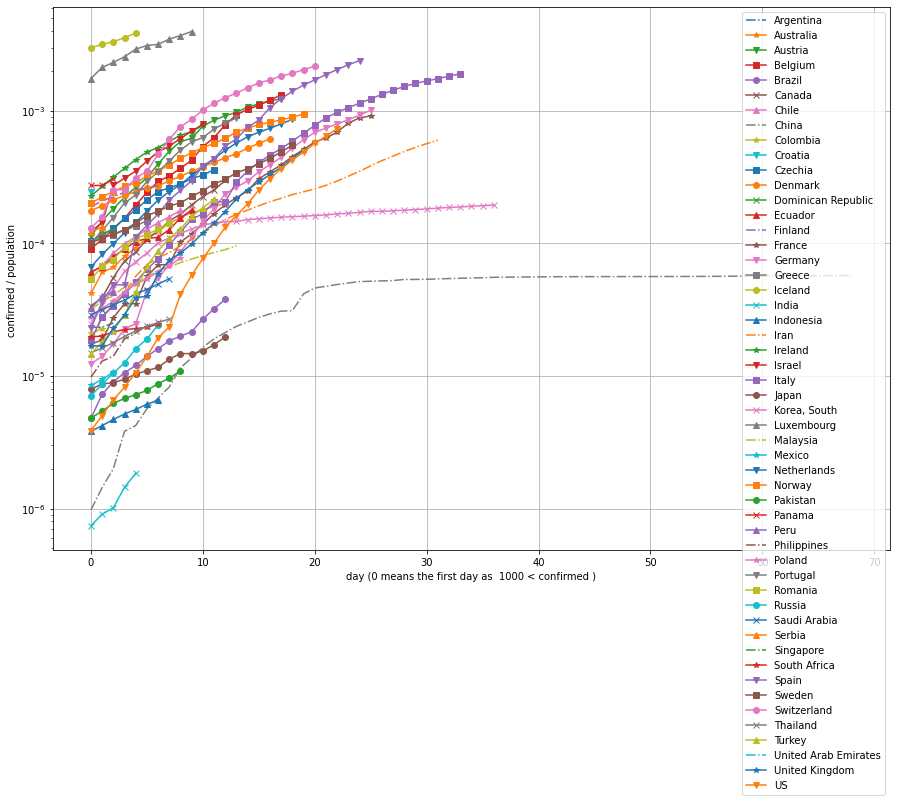

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["figure.facecolor"] = "w"


fig, ax = plt.subplots(figsize=(15, 10))
maker = ["-.",'-*','-v','-s','-o','-x',"-^"]

for i,ii in enumerate(country2[:]):
    df.plot(ax=ax, x="day",y=ii, style=maker[i%7])

#ax.get_legend().remove()
ax.grid(True)
ax.set_yscale('log')
#plt.text(30, 3*10**3, "{}".format("countries of over 1000 people as conformed"), fontsize=12)
ax.set_xlabel('day (0 means the first day as  1000 < confirmed )')
ax.set_ylabel('confirmed / population ')

